In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.set_option('max_colwidth', 30)
filepath = 'D:\\Draft\\Baseball_America_Rankings_Test.csv'
filepath = 'D:\\Draft\\Baseball_America_Rankings_Test_after_day_1.csv'
main_df = pd.read_csv(filepath)


In [2]:
#create positional df's
positions = ['RHP', 'LHP', 'SS', 'C', '1B', '2B', '3B', 'OF']
def positional_subsetter(position):
    conditional = main_df['Position'] == position
    subsetted_df = pd.DataFrame(main_df[conditional])
    subsetted_df = subsetted_df.reset_index(drop = True)
    subsetted_df.index += 1
    ranking_change_list = []
    for i in range(2,len(subsetted_df)+1):
        change = subsetted_df.at[i, 'OVR_Ranking'] - subsetted_df.at[i-1, 'OVR_Ranking']
        ranking_change_list.append(change)
    ranking_change_list.insert(0,0)
    subsetted_df['Instant_Change'] = ranking_change_list
    del subsetted_df['Position']
    return subsetted_df

df_rhp = positional_subsetter('RHP')
df_lhp = positional_subsetter('LHP')
df_ss = positional_subsetter('SS')
df_c = positional_subsetter('C')
df_1b = positional_subsetter('1B')
df_2b = positional_subsetter('2B')
df_3b = positional_subsetter('3B')
df_of = positional_subsetter('OF')


In [3]:
overall_change_list = [1,2,3,4,5,7,10]

specified_changes_ss = []
specified_changes_c = []
specified_changes_of = []
specified_changes_rhp = []
specified_changes_lhp = []
specified_changes_1b = []
specified_changes_2b = []
specified_changes_3b = []

for change in overall_change_list:
    specified_changes_ss.append(df_ss.at[1 + change, 'OVR_Ranking'] - df_ss.at[1, 'OVR_Ranking'])
    specified_changes_c.append(df_c.at[1 + change, 'OVR_Ranking'] - df_c.at[1, 'OVR_Ranking'])
    specified_changes_of.append(df_of.at[1 + change, 'OVR_Ranking'] - df_of.at[1, 'OVR_Ranking'])
    specified_changes_rhp.append(df_rhp.at[1 + change, 'OVR_Ranking'] - df_rhp.at[1, 'OVR_Ranking'])
    specified_changes_lhp.append(df_lhp.at[1 + change, 'OVR_Ranking'] - df_lhp.at[1, 'OVR_Ranking'])
    specified_changes_1b.append(df_1b.at[1 + change, 'OVR_Ranking'] - df_1b.at[1, 'OVR_Ranking'])
    specified_changes_3b.append(df_3b.at[1 + change, 'OVR_Ranking'] - df_3b.at[1, 'OVR_Ranking'])

end_df_specified_change = pd.DataFrame(data = list(zip(specified_changes_ss,
                                      specified_changes_c,
                                      specified_changes_of,
                                      specified_changes_rhp,
                                      specified_changes_lhp,
                                      specified_changes_3b,
                                      overall_change_list)), columns = ['SS', 'C', 'OF', 'RHP', 'LHP', '3B', 'Changes'])

end_df_specified_change = end_df_specified_change.set_index('Changes')


instant_change_list = [2,3,4,5,6,7,8,9,10]

instant_changes_ss = []
instant_changes_c = []
instant_changes_of = []
instant_changes_rhp = []
instant_changes_lhp = []
instant_changes_1b = []
instant_changes_2b = []
instant_changes_3b = []

for change in instant_change_list:
    instant_changes_ss.append(df_ss.at[0 + change, 'OVR_Ranking'] - df_ss.at[change - 1, 'OVR_Ranking'])
    instant_changes_c.append(df_c.at[0 + change, 'OVR_Ranking'] - df_c.at[change - 1, 'OVR_Ranking'])
    instant_changes_of.append(df_of.at[0 + change, 'OVR_Ranking'] - df_of.at[change - 1, 'OVR_Ranking'])
    instant_changes_rhp.append(df_rhp.at[0 + change, 'OVR_Ranking'] - df_rhp.at[change - 1, 'OVR_Ranking'])
    instant_changes_lhp.append(df_lhp.at[0 + change, 'OVR_Ranking'] - df_lhp.at[change - 1, 'OVR_Ranking'])
    instant_changes_1b.append(df_1b.at[0 + change, 'OVR_Ranking'] - df_1b.at[change - 1, 'OVR_Ranking'])
    instant_changes_3b.append(df_3b.at[0 + change, 'OVR_Ranking'] - df_3b.at[change - 1, 'OVR_Ranking'])

end_df_instant_change = pd.DataFrame(data = list(zip(instant_changes_ss,
                                      instant_changes_c,
                                      instant_changes_of,
                                      instant_changes_3b,
                                      instant_changes_rhp,
                                      instant_changes_lhp,
                                      instant_change_list)), columns = ['SS', 'C', 'OF', '3B','RHP', 'LHP','Changes'])

end_df_instant_change = end_df_instant_change.set_index('Changes')

In [4]:
end_df_specified_change, end_df_instant_change

(         SS    C   OF  RHP  LHP   3B
 Changes                             
 1         5   53    1   10    4   28
 2         7   69    3   24    9   44
 3        18   86   36   30   38   64
 4        37   88   57   33   49   75
 5        53  121   64   39   50   91
 7        67  201   84   47   62  168
 10       85  226  109   58   94  239,
          SS   C  OF  3B  RHP  LHP
 Changes                          
 2         5  53   1  28   10    4
 3         2  16   2  16   14    5
 4        11  17  33  20    6   29
 5        19   2  21  11    3   11
 6        16  33   7  16    6    1
 7         4   8  15  17    6   10
 8        10  72   5  60    2    2
 9         1   9   1   5    1    8
 10        8   9   4  59    1    7)

In [5]:
gradient_df = end_df_specified_change.style.background_gradient(cmap='bwr', axis = 1)
gradient_df_instant = end_df_instant_change.style.background_gradient(cmap='bwr', axis = 1)

def specified_change_visual(changes_passed_list):
    fig, ax = plt.subplots()
    ax.plot(end_df_specified_change.index, end_df_specified_change["SS"], color = 'r', label = "SS", marker = "^")
    ax.plot(end_df_specified_change.index, end_df_specified_change["C"], color = 'b', label = "C", marker = "^")
    ax.plot(end_df_specified_change.index, end_df_specified_change["OF"], color = 'g', label = "OF", marker = "^")
    ax.plot(end_df_specified_change.index, end_df_specified_change["3B"], color = 'c', label = "3B", marker = "^")
    ax.plot(end_df_specified_change.index, end_df_specified_change["RHP"], color = 'm', label = "RHP", marker = "^")
    ax.plot(end_df_specified_change.index, end_df_specified_change["LHP"], color = 'y', label = "LHP", marker = "^")
    ax.set_xlabel("Baseball America Relative Position Rank")
    ax.set_ylabel("Speed Change")
    plt.xlim(1, max(changes_passed_list))
    plt.xticks(changes_passed_list)
    plt.title("Speed Change. Change in Overall Ranking w.r.t position rank")
    yvals = [df_ss.at[max(changes_passed_list), 'OVR_Ranking'],
            df_c.at[max(changes_passed_list), 'OVR_Ranking'], 
            df_of.at[max(changes_passed_list), 'OVR_Ranking'],
            df_rhp.at[max(changes_passed_list), 'OVR_Ranking'], 
            df_lhp.at[max(changes_passed_list), 'OVR_Ranking'], 
            df_3b.at[max(changes_passed_list), 'OVR_Ranking']]
    plt.ylim(0,max(yvals))
    plt.legend()
    plt.show()
    


def overall_change_visual():
    fig, ax = plt.subplots()
    ax.plot(df_ss.index, df_ss["OVR_Ranking"], color = 'r', label = "SS")
    ax.plot(df_c.index, df_c["OVR_Ranking"], color = 'b', label = "C")
    ax.plot(df_of.index, df_of["OVR_Ranking"], color = 'g', label = "OF")
    ax.plot(df_3b.index, df_3b["OVR_Ranking"], color = 'c', label = "3B")
    ax.plot(df_rhp.index, df_rhp["OVR_Ranking"], color = 'm', label = "RHP")
    ax.plot(df_lhp.index, df_lhp["OVR_Ranking"], color = 'y', label = "LHP")
    ax.set_xlabel("Baseball America Position Rank")
    ax.set_ylabel("Baseball America Overall Rank")
    plt.xlim(1, 100)
    plt.ylim(0,500)
    plt.legend()
    plt.title("Overall Position Quality Change Visual")
    plt.show()

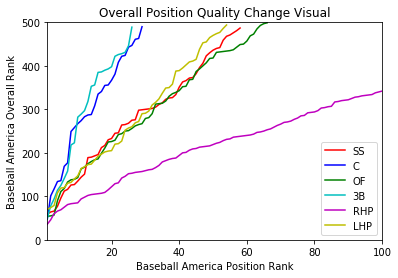

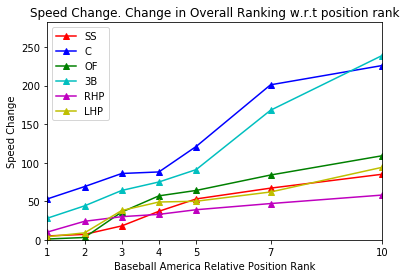

In [6]:
overall_change_visual(),
specified_change_visual([1,2,3,4,5,7,10])

In [7]:
gradient_df

,SS,C,OF,RHP,LHP,3B
Changes,,,,,,
1,5,53,1,10,4,28
2,7,69,3,24,9,44
3,18,86,36,30,38,64
4,37,88,57,33,49,75
5,53,121,64,39,50,91
7,67,201,84,47,62,168
10,85,226,109,58,94,239


In [8]:
gradient_df_instant

,SS,C,OF,3B,RHP,LHP
Changes,,,,,,
2,5,53,1,28,10,4
3,2,16,2,16,14,5
4,11,17,33,20,6,29
5,19,2,21,11,3,11
6,16,33,7,16,6,1
7,4,8,15,17,6,10
8,10,72,5,60,2,2
9,1,9,1,5,1,8
10,8,9,4,59,1,7
